In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

In [4]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [5]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)


num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_validation_samples, tf.int64)

In [6]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

In [7]:
scaled_train_and_validation = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [8]:
BUFFER_SIZE = 10000
shuffled_train_and_validation = scaled_train_and_validation
validation_data = shuffled_train_and_validation.take(num_validation_samples)
train_data = shuffled_train_and_validation.skip(num_validation_samples)

In [9]:
BATCH_SIZE = 100

validation_data = validation_data.batch(BATCH_SIZE)
train_data = train_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

validation_inputs, validation_targets = next(iter(validation_data))

In [10]:
input_size = 784
output_size = 10
hidden_layer_size = 200

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax')
])

model.compile(optimazer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
NUM_EPOCHS = 5
STEPS = num_validation_samples/BATCH_SIZE
model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), validation_steps=STEPS, verbose = 2)
        

Epoch 1/5
540/540 - 9s - loss: 0.2608 - accuracy: 0.9216 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
540/540 - 7s - loss: 0.1026 - accuracy: 0.9691 - val_loss: 0.1551 - val_accuracy: 0.9833
Epoch 3/5
540/540 - 7s - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.1092 - val_accuracy: 0.9750
Epoch 4/5
540/540 - 8s - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.1137 - val_accuracy: 0.9667
Epoch 5/5
540/540 - 8s - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0502 - val_accuracy: 0.9833


In [13]:
test_loss, test_accuracy = model.evaluate(test_data)

100/100 [==============================]0.1390 - accuracy: 0.960 - 0s 95ms/step - loss: 0.1026 - accuracy: 0.965 - 0s 72ms/step - loss: 0.1256 - accuracy: 0.97 - 0s 60ms/step - loss: 0.1009 - accuracy: 0.97 - 0s 53ms/step - loss: 0.0953 - accuracy: 0.97 - 0s 47ms/step - loss: 0.0821 - accuracy: 0.97 - 0s 43ms/step - loss: 0.0842 - accuracy: 0.97 - 0s 41ms/step - loss: 0.0818 - accuracy: 0.97 - 0s 41ms/step - loss: 0.0784 - accuracy: 0.97 - 0s 39ms/step - loss: 0.0916 - accuracy: 0.97 - 0s 38ms/step - loss: 0.0973 - accuracy: 0.97 - 0s 37ms/step - loss: 0.0923 - accuracy: 0.97 - 0s 36ms/step - loss: 0.0998 - accuracy: 0.97 - 0s 35ms/step - loss: 0.0963 - accuracy: 0.97 - 1s 35ms/step - loss: 0.0991 - accuracy: 0.97 - 1s 34ms/step - loss: 0.0958 - accuracy: 0.97 - 1s 33ms/step - loss: 0.0988 - accuracy: 0.97 - 1s 33ms/step - loss: 0.0965 - accuracy: 0.97 - 1s 32ms/step - loss: 0.0997 - accuracy: 0.97 - 1s 32ms/step - loss: 0.0966 - accuracy: 0.97 - 1s 31ms/step - loss: 0.0973 - accuracy:

In [14]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.09. Test accuracy: 97.52%


In [15]:
validation_inputs = tf.Variable(validation_inputs)

3


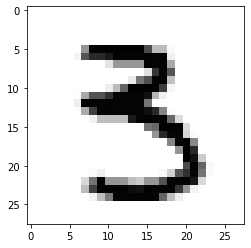

In [16]:
validation_input = tf.reshape(validation_inputs[12], (1,28, 28,1))

pred = model.predict(validation_input)

val_input = tf.reshape(validation_inputs[12], (28,28))

plt.imshow(val_input,cmap='Greys')
print(pred.argmax())